# Exploration of Data

In [1]:
import warnings
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as pltx
from IPython.display import Image
import os,sys
sys.path.append(os.path.abspath(os.path.join('..')))
from scripts.dataframe_overview import DfOverview
from scripts.dataframe_cleaner import DfCleaner

In [2]:
cleaned_df_store = pd.read_csv('../data/cleaned_store.csv')
cleaned_df_test = pd.read_csv('../data/cleaned_test.csv')
cleaned_df_train = pd.read_csv('../data/cleaned_train.csv')

In [3]:
sns.set()
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('expand_frame_repr', False)
pd.set_option('display.float_format', '{:.2f}'.format)

* Q.1 Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

In [4]:
train_data = cleaned_df_train
test_data = cleaned_df_test

In [5]:
def compare(train_data, test_data, feature, title):
  fig, ax = plt.subplots(1, 2, sharex=True, figsize=(12, 4))
  ax[0].set_title("Train data" + title)
  sns.countplot(x=feature, data=train_data, ax=ax[0])
  ax[1].set_title("Test data" + title)
  sns.countplot(x=feature, data=test_data, ax=ax[1])
  fig.subplots_adjust(wspace=0.5)
  fig.show()

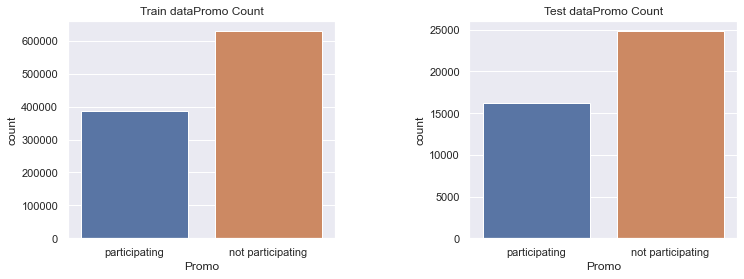

In [6]:
prom = ["not participating", "participating"]
train_data["Promo"] = train_data["Promo"].apply(lambda x: prom[x])
test_data["Promo"] = test_data["Promo"].apply(lambda x: prom[x])
compare(train_data, test_data, 'Promo', "Promo Count")

The distribution is just the same for the training and test data between not participating = 0 and participating = 1 for promotins

* Q.2 Check & compare sales behavior before, during and after holidays
    We have mainly three holidays state holiday(divided into many inside it weekend, easter,...) and school holiday.

In [7]:
state_holidays = ["Normal day", "Public holiday", "Easter holiday", "Christmas"]
s_h_train = train_data.groupby(['StateHoliday']).agg({'Sales':'mean'})
s_h_train.columns = ['Sales']
s_h_train = s_h_train.reset_index()
s_h_train["StateHoliday"] = s_h_train["StateHoliday"].apply(lambda x: state_holidays[x])
s_h_train

,StateHoliday,Sales
0,Normal day,5947.48
1,Public holiday,290.74
2,Easter holiday,214.31
3,Christmas,168.73


In [8]:
df_train_store = pd.merge(cleaned_df_train, cleaned_df_store, how='inner' , on='Store')
df_train_store.describe()
df_train_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 23 columns):
 #   Column                     Non-Null Count    Dtype 
---  ------                     --------------    ----- 
 0   Unnamed: 0_x               1017209 non-null  int64 
 1   Store                      1017209 non-null  int64 
 2   DayOfWeek                  1017209 non-null  int64 
 3   Date                       1017209 non-null  object
 4   Sales                      1017209 non-null  int64 
 5   Customers                  1017209 non-null  int64 
 6   Open                       1017209 non-null  int64 
 7   Promo                      1017209 non-null  object
 8   StateHoliday               1017209 non-null  int64 
 9   SchoolHoliday              1017209 non-null  int64 
 10  Unnamed: 0_y               1017209 non-null  int64 
 11  StoreType                  1017209 non-null  int64 
 12  Assortment                 1017209 non-null  int64 
 13  CompetitionDistance        

In [9]:
df_train_store['Date'] = pd.DatetimeIndex(df_train_store['Date'])
df_train_store['Year'] = pd.DatetimeIndex(df_train_store['Date']).year
df_train_store['Month'] = pd.DatetimeIndex(df_train_store['Date']).month
df_train_store['Day'] = pd.DatetimeIndex(df_train_store['Date']).day
df_train_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 26 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Unnamed: 0_x               1017209 non-null  int64         
 1   Store                      1017209 non-null  int64         
 2   DayOfWeek                  1017209 non-null  int64         
 3   Date                       1017209 non-null  datetime64[ns]
 4   Sales                      1017209 non-null  int64         
 5   Customers                  1017209 non-null  int64         
 6   Open                       1017209 non-null  int64         
 7   Promo                      1017209 non-null  object        
 8   StateHoliday               1017209 non-null  int64         
 9   SchoolHoliday              1017209 non-null  int64         
 10  Unnamed: 0_y               1017209 non-null  int64         
 11  StoreType                  1017209 no

In [10]:
df_train_store['Year'].min()
df_train_store['Year'].max()

2015

We can see the range of the years for this data is between 2013-2015

In [11]:
df_t_s = df_train_store.copy()

In [12]:
stores_types = ["a", "b", "c", "d"]
df_t_s["StoreType"] = df_t_s["StoreType"].apply(lambda x: stores_types[x])
store_type_df = df_t_s.groupby('StoreType').agg({'Customers': 'mean', 'Sales': 'mean'})
store_type_df = store_type_df.reset_index()
store_type_df

,StoreType,Customers,Sales
0,a,659.03,5738.18
1,b,1987.72,10058.84
2,c,673.27,5723.63
3,d,501.43,5641.82


In [13]:
def plot_trend(df_t_s, columns, feature, title, x_label="", y_label="", labels=['']):
  plt.figure(figsize=(18, 6))
  for i in range(len(columns)):
    sns.lineplot(x=df_t_s.index, y=df_t_s[columns[i]][feature], label=labels[i])
  plt.show()

In [14]:
monthly_trend = df_t_s.groupby(['Month', 'StoreType']).agg( {'Customers': 'mean', 'Sales': 'mean'})
monthly_trend = monthly_trend.unstack().swaplevel(0, 1, 1).sort_index(1)

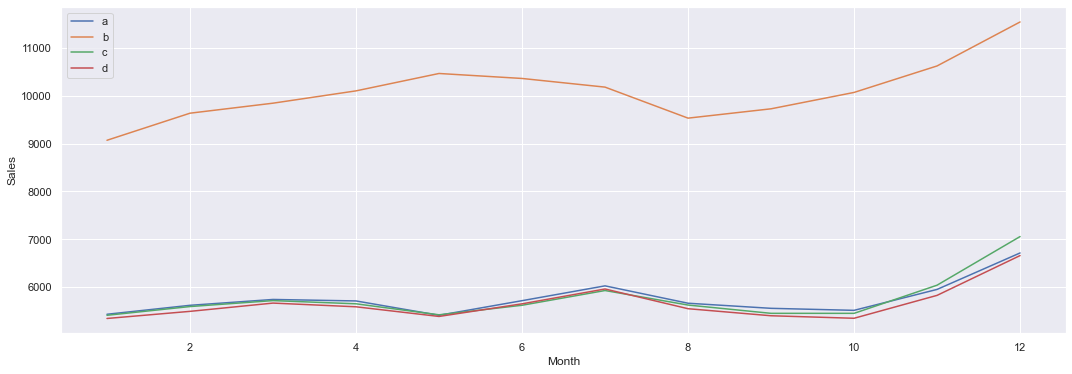

In [15]:
columns = ["a", "b", "c", "d"]
plot_trend(monthly_trend, columns, 'Sales', 'Average Monthly sales', labels=columns)

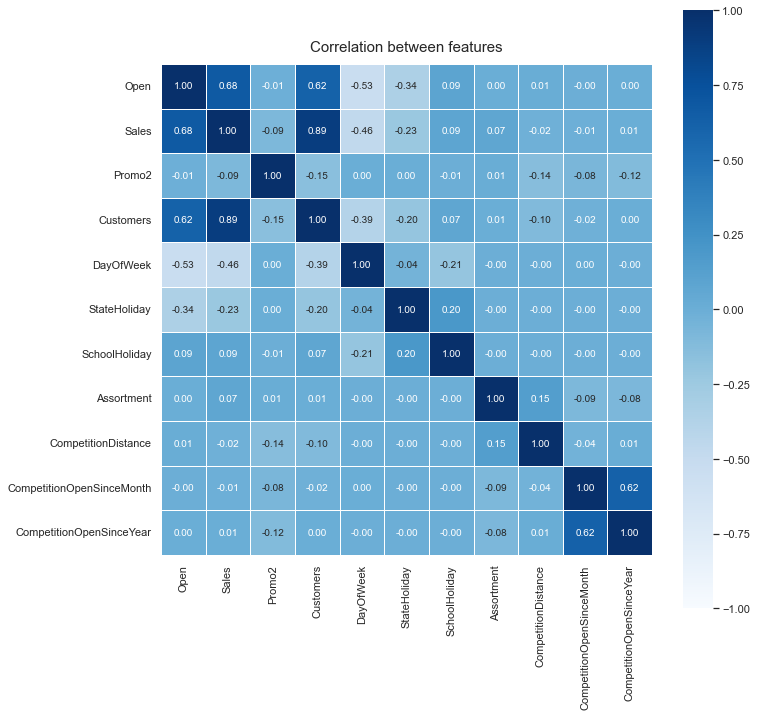

In [16]:
df_t_s = df_t_s.copy()
corr_all = df_t_s[['Open', 'Sales', 'Promo', 'Promo2', 'Customers', 'DayOfWeek', 'StateHoliday', 'SchoolHoliday', 'StoreType',
                           'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']].corr()

fig, ax = plt.subplots(figsize=(11, 11))
heatmap = sns.heatmap(corr_all, square=True, linewidths=.5,
                      vmin=-1, vmax=1, cmap='Blues', annot=True, fmt='.2f')

heatmap.set_title('Correlation between features', fontdict={'fontsize': 15}, pad=13)
fig.show()

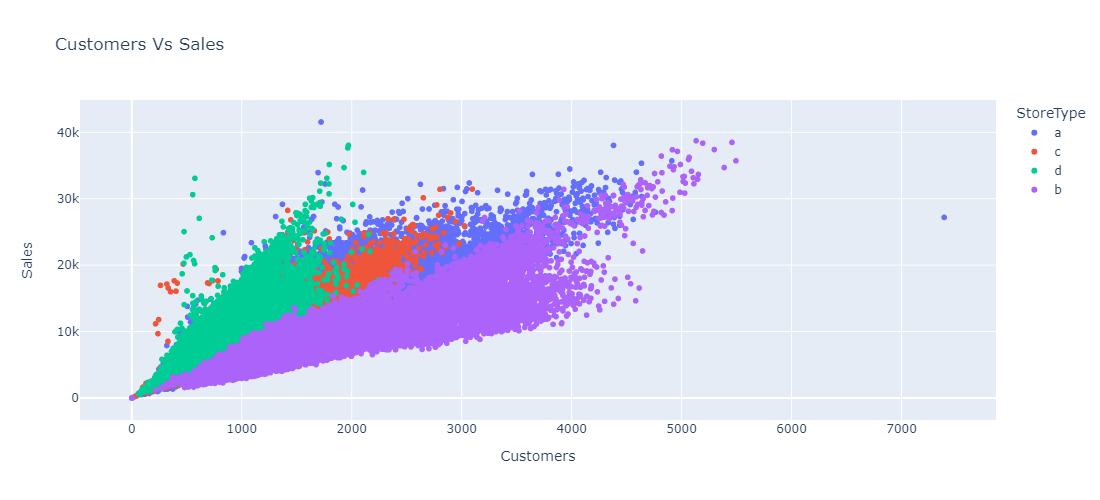

In [20]:
import plotly.io as pl
import kaleido
df_t_s = df_t_s.copy()
df_t_s["StoreType"] = df_t_s["StoreType"]
# .apply(lambda x: stores_types[x])
df_t_s = df_t_s.sort_values(by='Day', ascending=False)
df_t_s = df_t_s.sort_values(by='Month', ascending=False)
fig = pltx.scatter(df_t_s, x="Customers", y="Sales", color="StoreType", title="Customers Vs Sales")
Image(pl.to_image(fig, format='png', width=1100))
# fig.show()

It's clear that increasing of customers mean increase sales

In [23]:
df_t_s["Promo"] = df_t_s["Promo"]
df_t_s["Promo2"] = df_t_s["Promo2"]
overall_trend = df_t_s.groupby(['Promo', 'Promo2',]).agg({'Customers': 'mean', 'Sales': 'mean'})
overall_trend

Customers   Sales
Promo             Promo2                   
not participating 0          578.45 4722.19
                  1          457.43 4091.11
participating     0          904.40 8393.78
                  1          735.78 7588.42

In [ ]:
plot = sns.factorplot(data=df_t_s, x='Month', y="Sales", hue='Year',
                    row='Promo', col='Promo2', color='red', size=4, aspect=2)
#plot.fig.subplots_adjust(top=.) 
#fp.fig.suptitle("The impact of promo and promo2 on seles each year", fontsize=15, fontweight='bold')
#plt.show()